In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프 틀 변경
plt.rcParams['axes.unicode_minus'] = False
sns.set(font_scale = 1)  
plt.style.use(['fivethirtyeight'])
pd.set_option('display.max_columns', None)

In [2]:
# 한글폰트 사용
import os

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")
else :

    plt.rc("font", family="Malgun Gothic")

In [3]:
df = pd.read_csv("Data/covid_data.csv", index_col = 0)
df.tail(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,일,주,거리두기
70,199030,559156,2021-12-18,도봉구,-,기타 확진자 접촉,NaN,2021,12,18,50,4.0
71,199029,559155,2021-12-18,도봉구,-,기타 확진자 접촉,NaN,2021,12,18,50,4.0
72,199028,559168,2021-12-18,도봉구,-,감염경로 조사중,NaN,2021,12,18,50,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203100 entries, 76 to 72
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   연번      203100 non-null  int64  
 1   환자      203100 non-null  int64  
 2   확진일     203100 non-null  object 
 3   거주지     203100 non-null  object 
 4   여행력     203100 non-null  object 
 5   접촉력     203100 non-null  object 
 6   퇴원현황    148547 non-null  object 
 7   년       203100 non-null  int64  
 8   월       203100 non-null  int64  
 9   일       203100 non-null  int64  
 10  주       203100 non-null  int64  
 11  거리두기    203100 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 20.1+ MB


In [5]:
# null 값 보기 
tot = df.isnull().sum().sort_values(ascending=False)
pct = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([tot, pct], axis=1, keys=['Total', 'Percent'])
missing_data

# 퇴원현황 컬럼안에는 아직 퇴원, 사망으로 기록되지 않은 환자들이 존재함으로 결측값 있음 

,Total,Percent
퇴원현황,54553,0.268602
연번,0,0.000000
환자,0,0.000000
확진일,0,0.000000
거주지,0,0.000000
여행력,0,0.000000
접촉력,0,0.000000
년,0,0.000000
월,0,0.000000
일,0,0.000000


In [6]:
#  확진일 datatime 형태로 변경 
df["확진일"] = pd.to_datetime(df["확진일"])

In [7]:
x= df["확진일"].value_counts().sort_index()

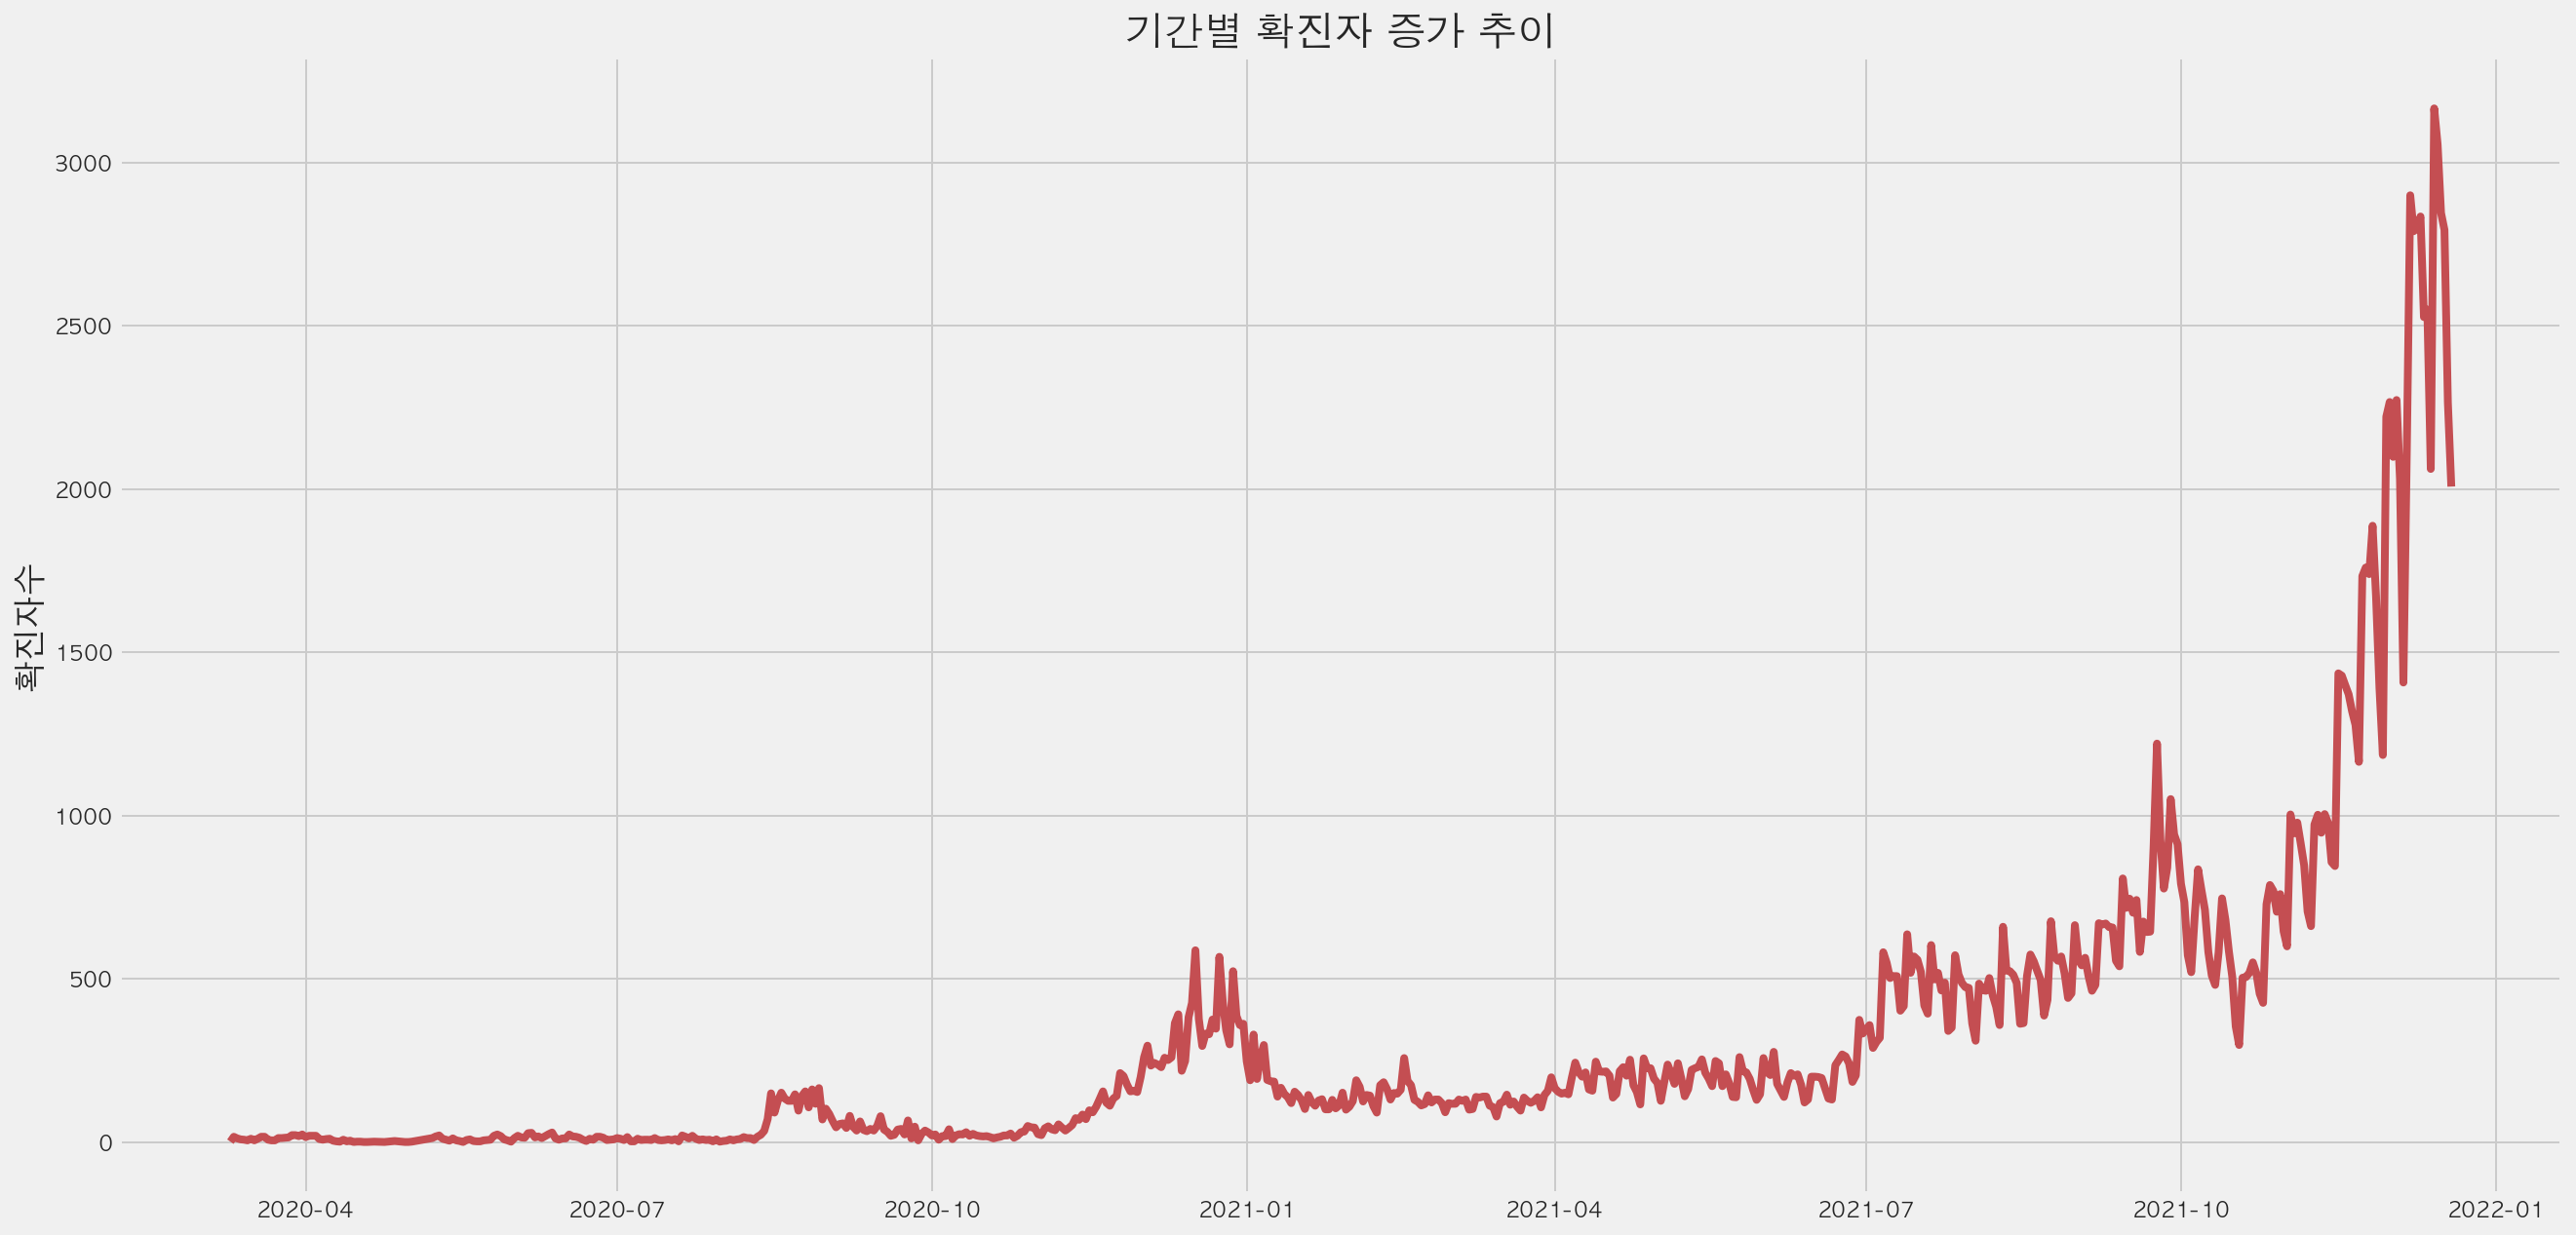

In [8]:
fig , ax = plt.subplots(figsize =  (20,10))

sns.lineplot( x.index, x.values , ax = ax,color = "r")
ax.set_title("기간별 확진자 증가 추이")
ax.set_ylabel("확진자수")
plt.show()
# st.pyplot(fig)

> 20.3.10 ~ 21-12-15 까지의 코로나 확진자수를 나타낸 라인 그래프입니다.   
20년도에는 집단감염원인이 그래프의 변동성을 키웠고 21년도에 들어서면서 집단감염이 아닌 지역감염으로 번짐에 따라 확진자수가 가파르게 증가하는 것을 볼 수 있습니다.

In [9]:
df_거리두기 = df.set_index("확진일")
df_거리두기

,연번,환자,거주지,여행력,접촉력,퇴원현황,년,월,일,주,거리두기
확진일,,,,,,,,,,,
2020-03-21,324,8816,서초구,-,감염경로 조사중,퇴원,2020,3,21,12,0.0
2020-03-21,323,8826,서대문구,-,감염경로 조사중,퇴원,2020,3,21,12,0.0
2020-03-21,322,8881,서대문구,유럽,해외유입,퇴원,2020,3,21,12,0.0
2020-03-21,321,8836,영등포구,유럽,해외유입,퇴원,2020,3,21,12,0.0
2020-03-21,320,8848,성동구,-,감염경로 조사중,퇴원,2020,3,21,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-18,199032,559474,도봉구,-,기타 확진자 접촉,NaN,2021,12,18,50,4.0
2021-12-18,199031,558996,강남구,-,송파구 소재 시장 관련('21.11.),NaN,2021,12,18,50,4.0
2021-12-18,199030,559156,도봉구,-,기타 확진자 접촉,NaN,2021,12,18,50,4.0


In [10]:
x= df_거리두기.index.value_counts().sort_index()
x

2020-03-10       2
2020-03-11      17
2020-03-12      12
2020-03-13       9
2020-03-14       8
              ... 
2021-12-15    3056
2021-12-16    2846
2021-12-17    2794
2021-12-18    2265
2021-12-19    2008
Name: 확진일, Length: 638, dtype: int64

In [11]:
y= df_거리두기['거리두기']
y.values

array([0., 0., 0., ..., 4., 4., 4.])

#### 거리 두기 시행 
20.3.22 ~ 20.4.7 (강화된 거리두기 )  2단계  
20.04.08 ~ 20.4,19 (첫 집합금지 명령) 2단계  
20.4.20 ~ 20.5.5 (일부조치 완하) 1단계  
20.5.6 ~ 20.8.15  (생활속 거리두기) 0단계  
20.8.16 ~ 20.8.20 2단계   
20.8.21 ~ 20.9.12 2.5 단계   
20.9.13 ~ 20.10.10 2단계  
20.10.11 ~ 11.16 1단계  
20.11.17 ~ 20.11.23 1.5 단계  
20.11.24 ~ 20.12.7 2단계  
20.12.8 ~ 21.2.14 2.5단계  
21.2.15 ~ 21.10.31 2단계   
21.11.1 ~ 21.12.16 0단계   

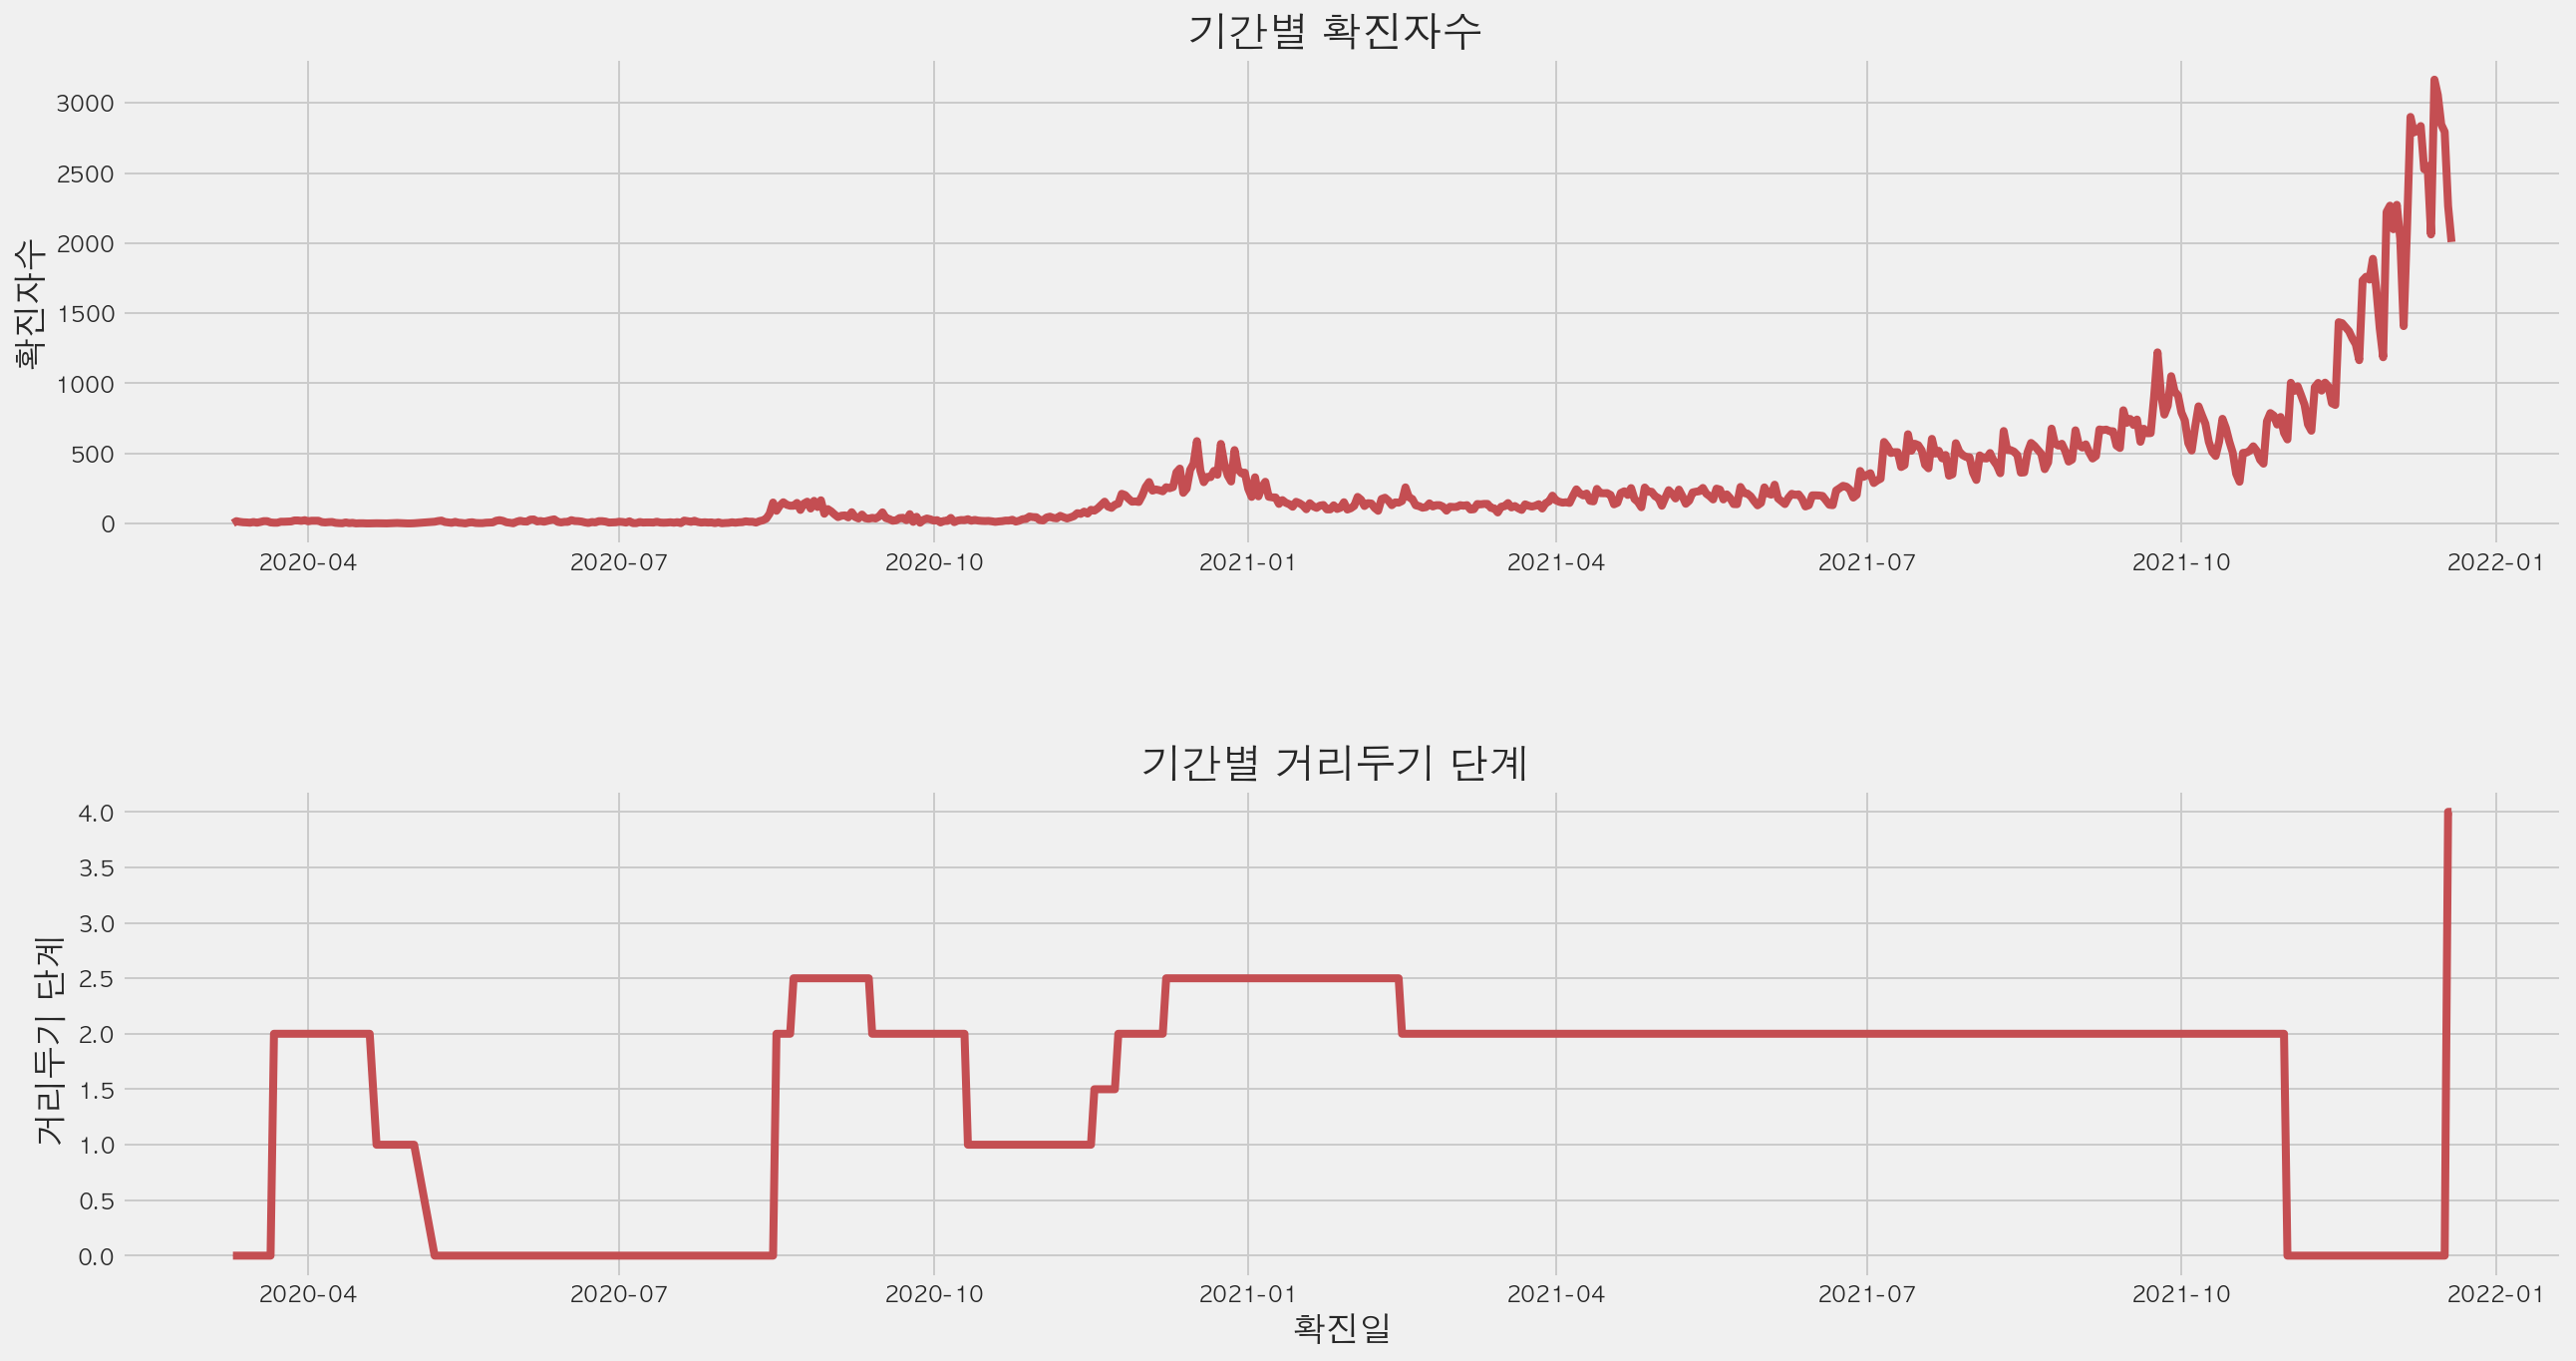

In [12]:
# 합쳐서 사용
fig ,(ax0,ax1 ) = plt.subplots(2,1 ,figsize =  (20,10), sharey =False) # x,y축값을 동일시 

sns.lineplot( x.index, x.values , ax = ax0,color = "r")
sns.lineplot( y.index, y.values , ax = ax1,color = "r")

ax0.set_title("기간별 확진자수 ")
ax0.set_ylabel("확진자수")

ax1.set_title("기간별 거리두기 단계 ")
ax1.set_ylabel("거리두기 단계 ")

fig.tight_layout() # 메소드는 서브 플롯간에 올바른 간격을 자동으로 유지합니다.
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.7, hspace=0.5) #  #subplot 간 간격 조절
plt.show()

>기간별 확진자수와 거리두기단계 라인 그래프를 함께 나타낸 그래프입니다. 위의 그래프는 거리두기 단계에 따른 코로나 확진자 추이를 살펴보기 위해 제작하였습니다.   
거리두기 초반에는 확진자수 증가 추이에 맞추어 거리두기 단계를 상승시킨 것을 볼 수 있습니다. 중반기에는 거리두기 2단계 유지로 어느정도 확진자 수가 유지되어 오는것 처럼 보였지만 하반기에 단계적 일상회복으로 인해 단계가 0 단계로 하향조정 되자 확진자수가 급증하였습니다.  
거리두기 단계가 낮아지면 확진자수가 증가하는 양상이 보이기 때문에 확진자와 거리두기 단계간 음의 상관관계를 갖고 있다고 할 수 있습니다.

In [13]:
df_거리두기_death_ = df_거리두기[df_거리두기["퇴원현황"] == "사망"]

In [14]:
# 거리두기에 따른 확진자 사망 
x = df_거리두기_death_.groupby("거리두기")["퇴원현황"].value_counts()
x = x.unstack()
x["사망"].index

Float64Index([0.0, 1.0, 1.5, 2.0, 2.5, 4.0], dtype='float64', name='거리두기')

In [15]:
df_거리두기_death = df_거리두기_death_.groupby(["거리두기", "퇴원현황"])["연번"].count().unstack().fillna(0).astype(int)
df_거리두기_death.style.background_gradient(cmap="Reds", vmin =0 ,vmax = 600)

퇴원현황,사망
거리두기,
0.000000,628
1.000000,18
1.500000,13
2.000000,537
2.500000,293
4.000000,4


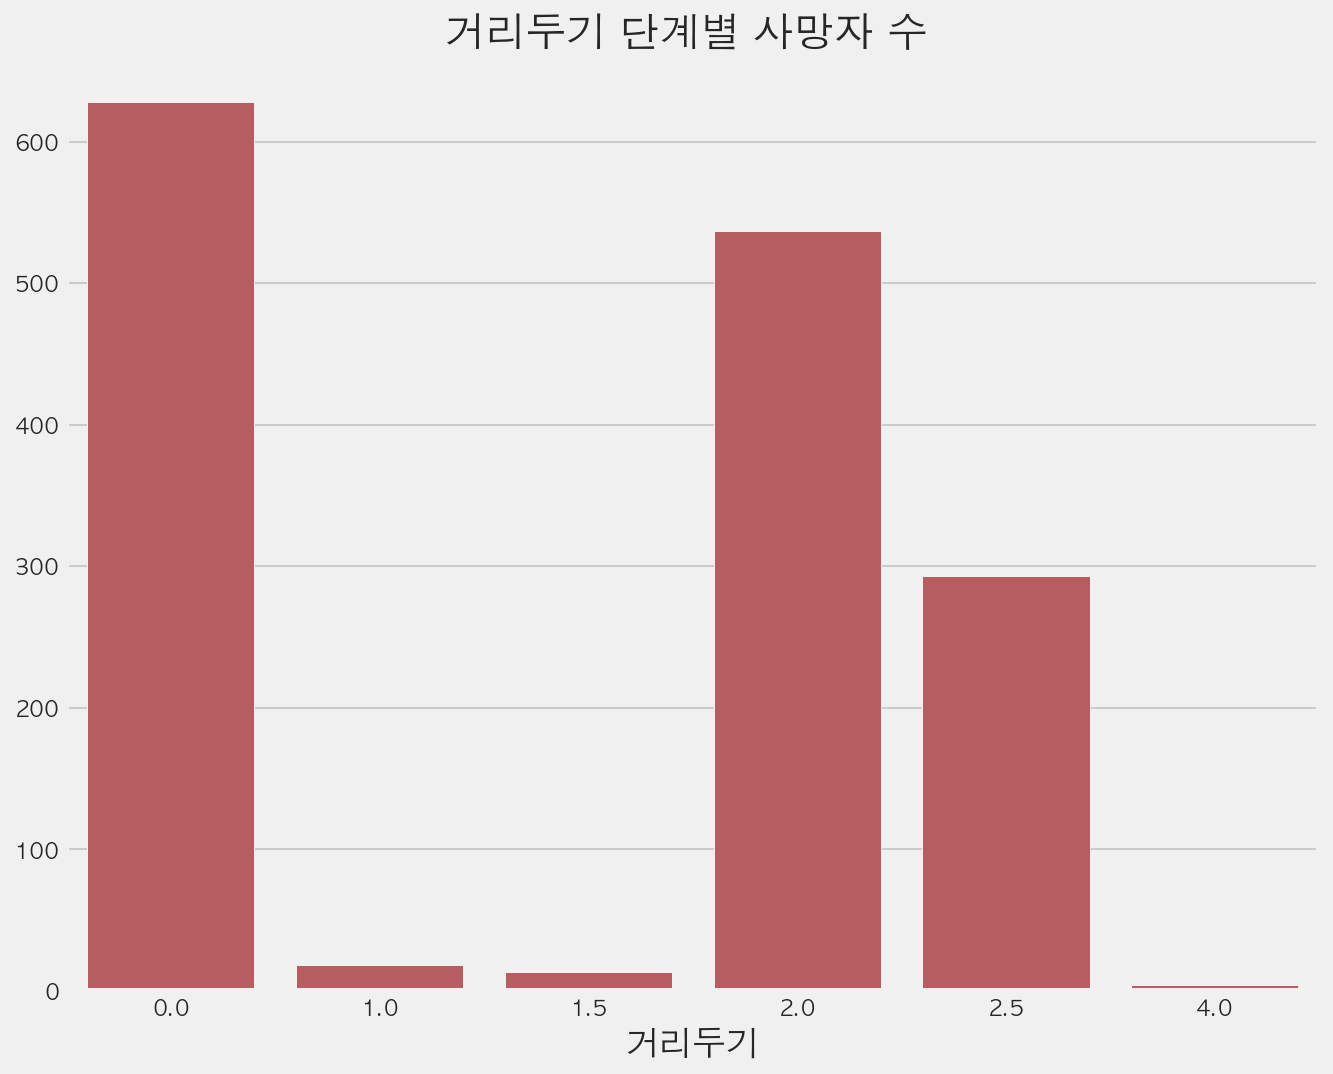

In [16]:
fig ,ax  = plt.subplots(figsize = (10,8))
sns.barplot(x["사망"].index , x["사망"].values , ax = ax ,color ='r')

ax.set_title("거리두기 단계별 사망자 수 ")
plt.show()

> 코로나에 따른 사망자 수는 0단계에서 가장 많았습니다. 상대적으로 0단계 보다 2단계 거리두기 단계 실시 기한 길었음에도 불구하고 단기간에 확진자가 증가하면서 사망자 또한 같이 증가한 것으로 보입니다.

### 접촉력 파악 

In [17]:
t = df["접촉력"].value_counts().sort_values().tail(10)

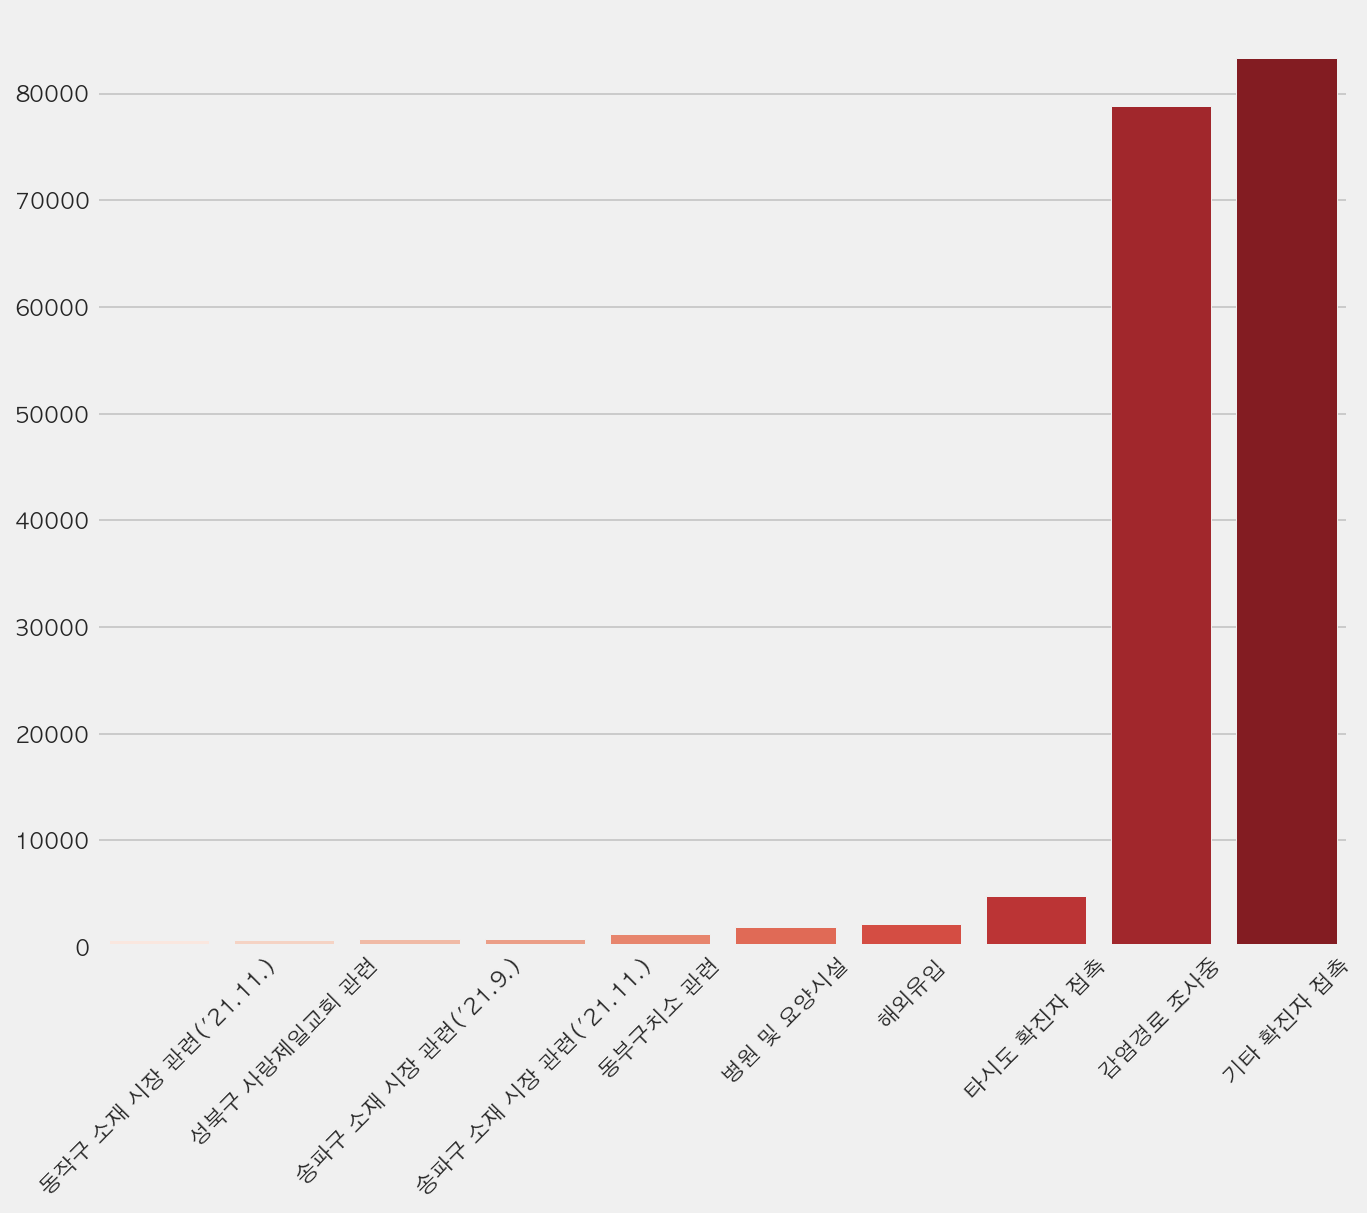

In [18]:
# 전체 기준
fig ,ax  = plt.subplots(figsize = (10,8))
sns.set_palette("Reds", 10)
sns.barplot(t.index , t.values , ax = ax )
plt.xticks(rotation = 45)
plt.show()

> 전체 기간 확진자 접촉력에 대해 파악한 막대 그래프입니다.   
최근 지역감염이 급격하게 증가하며 '기타확진자 접촉', '감염경로조사중' 등 원인을 파악하기 어려운 경우가 다분한것으로 보입니다.

In [19]:
top_ = df[df["접촉력"].isin(t.tail(15).index)]
top_

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,일,주,거리두기
76,324,8816,2020-03-21,서초구,-,감염경로 조사중,퇴원,2020,3,21,12,0.0
77,323,8826,2020-03-21,서대문구,-,감염경로 조사중,퇴원,2020,3,21,12,0.0
78,322,8881,2020-03-21,서대문구,유럽,해외유입,퇴원,2020,3,21,12,0.0
79,321,8836,2020-03-21,영등포구,유럽,해외유입,퇴원,2020,3,21,12,0.0
80,320,8848,2020-03-21,성동구,-,감염경로 조사중,퇴원,2020,3,21,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68,199032,559474,2021-12-18,도봉구,-,기타 확진자 접촉,NaN,2021,12,18,50,4.0
69,199031,558996,2021-12-18,강남구,-,송파구 소재 시장 관련('21.11.),NaN,2021,12,18,50,4.0
70,199030,559156,2021-12-18,도봉구,-,기타 확진자 접촉,NaN,2021,12,18,50,4.0
71,199029,559155,2021-12-18,도봉구,-,기타 확진자 접촉,NaN,2021,12,18,50,4.0


In [20]:
# 2020년 기준 
top_group_2020 = top_[top_["년"]==2020].groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)
top_group_2020.style.background_gradient(cmap="Blues")

월,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,
감염경로 조사중,37,16,5,66,49,440,286,120,474,2729
기타 확진자 접촉,10,9,0,14,33,439,304,116,631,4023
동부구치소 관련,0,0,0,0,0,0,0,0,3,930
병원 및 요양시설,0,0,0,0,0,1,0,0,0,2
성북구 사랑제일교회 관련,0,0,0,0,0,628,13,0,0,0
타시도 확진자 접촉,0,1,2,4,13,102,71,33,124,466
해외유입,126,111,25,23,39,50,23,44,83,110


> 20년 확진자 접촉력을 나타낸 맵 그래프입니다.   
코로나 초기에는 해외유입으로 인한 확진자 수가 많고 '사랑제일교회', 동부구치소' 등 집단감염이 코로나 확진의 주요 원인으로 보입니다.

In [21]:
# 2021년 기준 
top_group_2021 = top_[top_["년"]==2021].groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)
top_group_2021.style.background_gradient(cmap="Reds")

월,1,2,3,4,5,6,7,8,9,10,11,12
접촉력,,,,,,,,,,,,
감염경로 조사중,1348,964,1012,1517,1675,2270,5231,5601,8871,8187,14373,23529
기타 확진자 접촉,1961,1497,1324,2047,2244,2264,6172,6734,8865,7776,16516,20317
동부구치소 관련,242,0,0,0,0,0,0,0,0,0,0,0
동작구 소재 시장 관련('21.11.),0,0,0,0,0,0,0,0,0,0,522,98
병원 및 요양시설,57,82,63,69,113,79,181,155,201,249,409,212
송파구 소재 시장 관련('21.11.),0,0,0,0,0,0,0,0,0,0,302,469
송파구 소재 시장 관련('21.9.),0,0,0,0,0,0,0,1,688,66,0,0
타시도 확진자 접촉,212,146,243,355,354,360,616,530,595,112,253,162
해외유입,149,132,64,80,75,106,163,189,134,116,166,166


> 21년에는 20년과 상이하게 지역감염으로 코로나가 확산되며 접촉력을 알 수 없는 확진자가 많은것을 볼 수 있습니다

### 퇴원자 사망자 비교

In [22]:
df["퇴원"] = df["퇴원현황"].str.contains("퇴원", na=False)
df["사망"] = df["퇴원현황"].str.contains("사망", na=False)

In [23]:
np.round(df["퇴원"].value_counts(normalize=True),2)

True     0.72
False    0.28
Name: 퇴원, dtype: float64

In [24]:
np.round(df["사망"].value_counts(normalize=True),2)

False    0.99
True     0.01
Name: 사망, dtype: float64

In [25]:
퇴원_value = df["퇴원현황"].value_counts()
퇴원_value

퇴원    147054
사망      1493
Name: 퇴원현황, dtype: int64

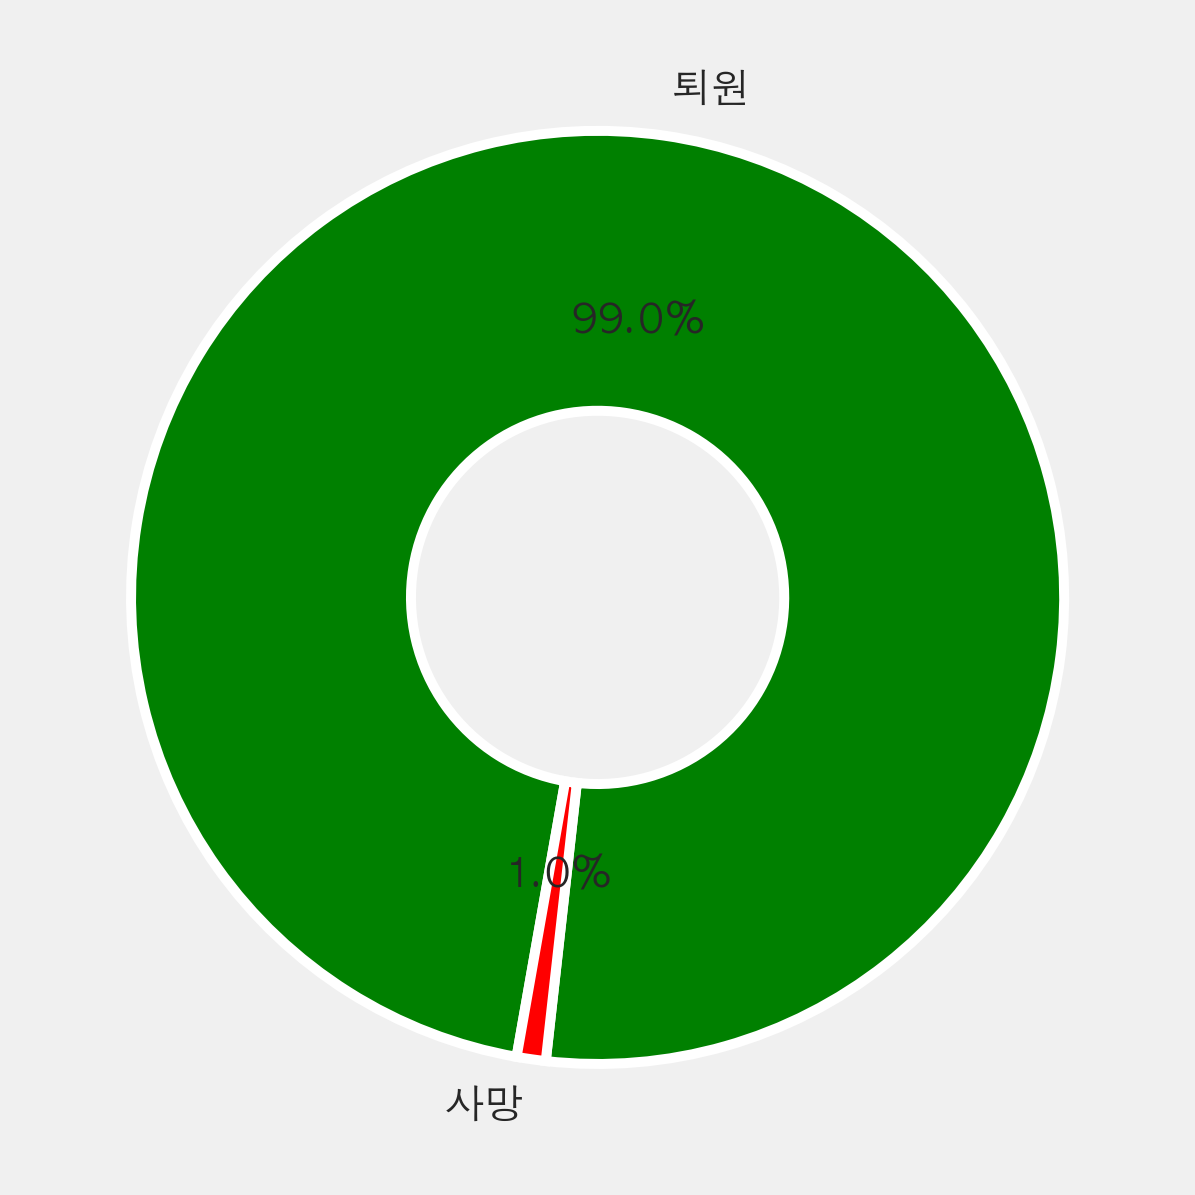

In [26]:
# 전체 사망자 비율 파이차트 
fig , ax  = plt.subplots(figsize = (13,10))
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 5}
colors = ["green","red"]

ax.pie(x = 퇴원_value.values, labels = 퇴원_value.index, autopct='%.1f%%'
      ,  startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :20}, colors = colors)

# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.
# startangle는 부채꼴이 그려지는 시작 각도를 설정합니다.
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됩니다

plt.show()

 확진자중 퇴원과 사망한 확진자의 분포를 나타낸 파이차트 입니다. 

>파이차트만으로는 확진자 중 사망자가 1%로 적은걸 알 수 있습니다. 하지만 이는 잘못된 결론이라고 판단이 듭니다.코로나의 치명률은 연령대에 다르기 때문입니다. 

>현재 데이터가 부족해 분석을 진행하지는 못하지만 조사해본 봐로는 20대의 경우 치명률이 0.01%이고 30대 0.04%, 40대 0.06%, 50대 0.26%로 1% 미만이지만 코로나 치명률은 고령층으로 갈수록 크게 뜁니다. 
**60대는 1.05%, 70대는 5.57%, 80대 이상은 18.69%**에 달했다.

**이와 같이 단순 총 사망자 분포를 통해 코로나가 치명적이지 않다고 단정 지을 수는 없다고 생각합니다.**

In [27]:
df_death = df[df["퇴원현황"] == "사망"]
df_alive = df[df["퇴원현황"] == "퇴원"]

In [28]:
# 2020일별 사망자수 (계절성)
df_d_2020 = df_death[df_death["년"]==2020].groupby(["퇴원현황", "월","일"])["연번"].count().unstack().fillna(0).astype(int)
df_d_2020.style.background_gradient(cmap="Reds", vmin =0 ,vmax = 20)

> 20년도 월,일 기준으로 그래낸 맵 차트입니다.   
결국 확진자수가 겨울철에 확산되면서 이에 따라 사망자 수도 증가한 것을 볼 수 있습니다.

In [29]:
# 2021일별 사망자수 (계절성, 중환자수가 늘어나서 인가? )
df_d_2021 = df_death[df_death["년"]==2021].groupby(["퇴원현황", "월","일"])["연번"].count().unstack().fillna(0).astype(int)
df_d_2021.style.background_gradient(cmap="Reds", vmin =0 ,vmax = 20)

20년와 동일하게 겨울철이 도래하면서 사망자수가 증가하는 것을 볼 수 있습니다.

### 여행력 별 확진자 

In [30]:
df["해외"] = df["여행력"]
df["해외"] = df["해외"].replace("-",np.nan) # - 를 NaN으로 변경 

df_oversea =df[df["해외"].notnull()].copy()
df_oversea.drop(df[df["해외"] == "성석교회 관련 확진자 접촉 추정"].index ,inplace =True ) 
df_oversea.drop(df[df["해외"] == "천리교 혜성교회 생활관 거주자 집단확진"].index ,inplace =True ) 

In [31]:
europe = "체코,헝가리,오스트리아,이탈리아,프랑스,모로코,독일,스페인,영국,폴란드,터키,아일랜드"
europe = europe.replace(",", "|")
south_america = "브라질,아르헨티아,칠레,볼리비아,멕시코,페루"
south_america = south_america.replace(",", "|")

df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = '유럽'
df_oversea.loc[df_oversea["해외"].str.contains(south_america), "해외"] = '남미'
df_oversea.loc[df_oversea["해외"].str.contains('중국|우한'), "해외"] = '중국'
df_oversea.loc[df_oversea["해외"].str.contains('아랍에미리트'), "해외"] = 'UAE'
df_oversea.loc[df_oversea["해외"].str.contains('필리핀'), "해외"] = '필리핀'
df_oversea.loc[df_oversea["해외"].str.contains('미국'), "해외"] = '미국'

df_oversea.head(3)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,일,주,거리두기,퇴원,사망,해외
78,322,8881,2020-03-21,서대문구,유럽,해외유입,퇴원,2020,3,21,12,0.0,True,False,유럽
79,321,8836,2020-03-21,영등포구,유럽,해외유입,퇴원,2020,3,21,12,0.0,True,False,유럽
83,317,8835,2020-03-21,강서구,필리핀,해외유입,퇴원,2020,3,21,12,0.0,True,False,필리핀


In [32]:
import re 
def d(s):
    contry = re.compile('[^ ㄱ-ㅣ가-힣+]')# 한글과 띄어쓰기를 제외한 모든 글자
    result = contry.sub('', s) # 한글과 띄어쓰기를 제외한 모든 부분을 제거
    return(result)

In [33]:
df_oversea["해외"] = df_oversea["해외"].apply(d)

In [34]:
set(df_oversea["해외"])

{'',
 ' ',
 '  ',
 '가나',
 '강남관악',
 '강릉',
 '경기도 김포시',
 '과테말라',
 '괌',
 '그리스',
 '나이지리아',
 '남미',
 '남아공',
 '남아프리카공화국',
 '네덜란드',
 '네팔',
 '덴마크',
 '도미니카공화국',
 '도봉구',
 '동남아시아',
 '두바이',
 '라오스',
 '러브코랄무드',
 '러시아',
 '레바논',
 '루마니아',
 '르완다',
 '리투아니아',
 '마케도니아',
 '말레이시아',
 '모리셔스',
 '모리타니아',
 '몰디브',
 '몰타',
 '몽골',
 '미국',
 '미얀마',
 '바레인',
 '방글라데시',
 '방콕 푸켓',
 '베네수엘라',
 '베트남',
 '베트남 사이공',
 '벨기에',
 '북미',
 '불가리아',
 '사우디아라비아',
 '상명중학교',
 '세네갈',
 '수단',
 '스리랑카',
 '스리랑카 ',
 '스웨덴',
 '스위스',
 '슬로바키아',
 '시에라리온',
 '싱가포르',
 '싱가폴',
 '아랍에미레이트',
 '아르헨티나',
 '아메리카',
 '아보카도랩',
 '아시아',
 '아이슬란드',
 '아이티공화국',
 '아제르바이잔',
 '아프가니스탄',
 '아프리카',
 '아프리카 아시아',
 '아프카니스탄',
 '알제리',
 '에티오피나',
 '에티오피아',
 '역조서미수령',
 '오만',
 '오세아니아',
 '요르단',
 '우즈베키스탄',
 '우크라이나',
 '유럽',
 '이라크',
 '이란',
 '이스라엘',
 '이집트',
 '인도',
 '인도 ',
 '인도 델리',
 '인도네시아',
 '인도네시아자카르타',
 '인도네시아자카르타 경유',
 '일본',
 '일본도쿄',
 '자카르타',
 '잠비아',
 '조사중',
 '중국',
 '중남미유럽',
 '중동',
 '중복',
 '짐바브웨',
 '카자흐스탄',
 '카타르',
 '캄보디아',
 '캄보디아프노펜경유',
 '캐나다',
 '캐나다 ',
 '케냐',
 '코스타리카',
 '코트디부아르',
 '코펜하겐',
 '콜롬

In [35]:
oversea_group  = df_oversea.groupby(["확진일","해외"])["연번"].count()

In [36]:
oversea_group = oversea_group.groupby(level = [1]).cumsum()
oversea_group

확진일         해외   
2020-03-11  유럽         1
2020-03-12  유럽         3
            필리핀        1
2020-03-13  유럽         5
2020-03-14  필리핀        2
                    ... 
2021-12-19  슬로바키아      1
            유럽       433
            중국        47
            캐나다        1
            호주         3
Name: 연번, Length: 1400, dtype: int64

In [37]:
oversea_group = oversea_group.reset_index()
oversea_group = oversea_group.rename(columns={"연번": "누적확진수"})
oversea_group.head(3)

,확진일,해외,누적확진수
0,2020-03-11,유럽,1
1,2020-03-12,유럽,3
2,2020-03-12,필리핀,1


In [38]:
oversea_group_2020 = oversea_group[oversea_group["확진일"].isin(pd.date_range("2020-03-11", "2020-12-31")) ]
oversea_group_2021 = oversea_group[oversea_group["확진일"].isin(pd.date_range("2021-01-01", "2021-12-15")) ]

In [39]:
# 전체 , 2021, 2020
oversea_count = oversea_group["해외"].value_counts().sort_values().tail(10)
oversea_count_2021 =  oversea_group_2021["해외"].value_counts().sort_values().tail(10)
oversea_count_2020 = oversea_group_2020["해외"].value_counts().sort_values().tail(10)

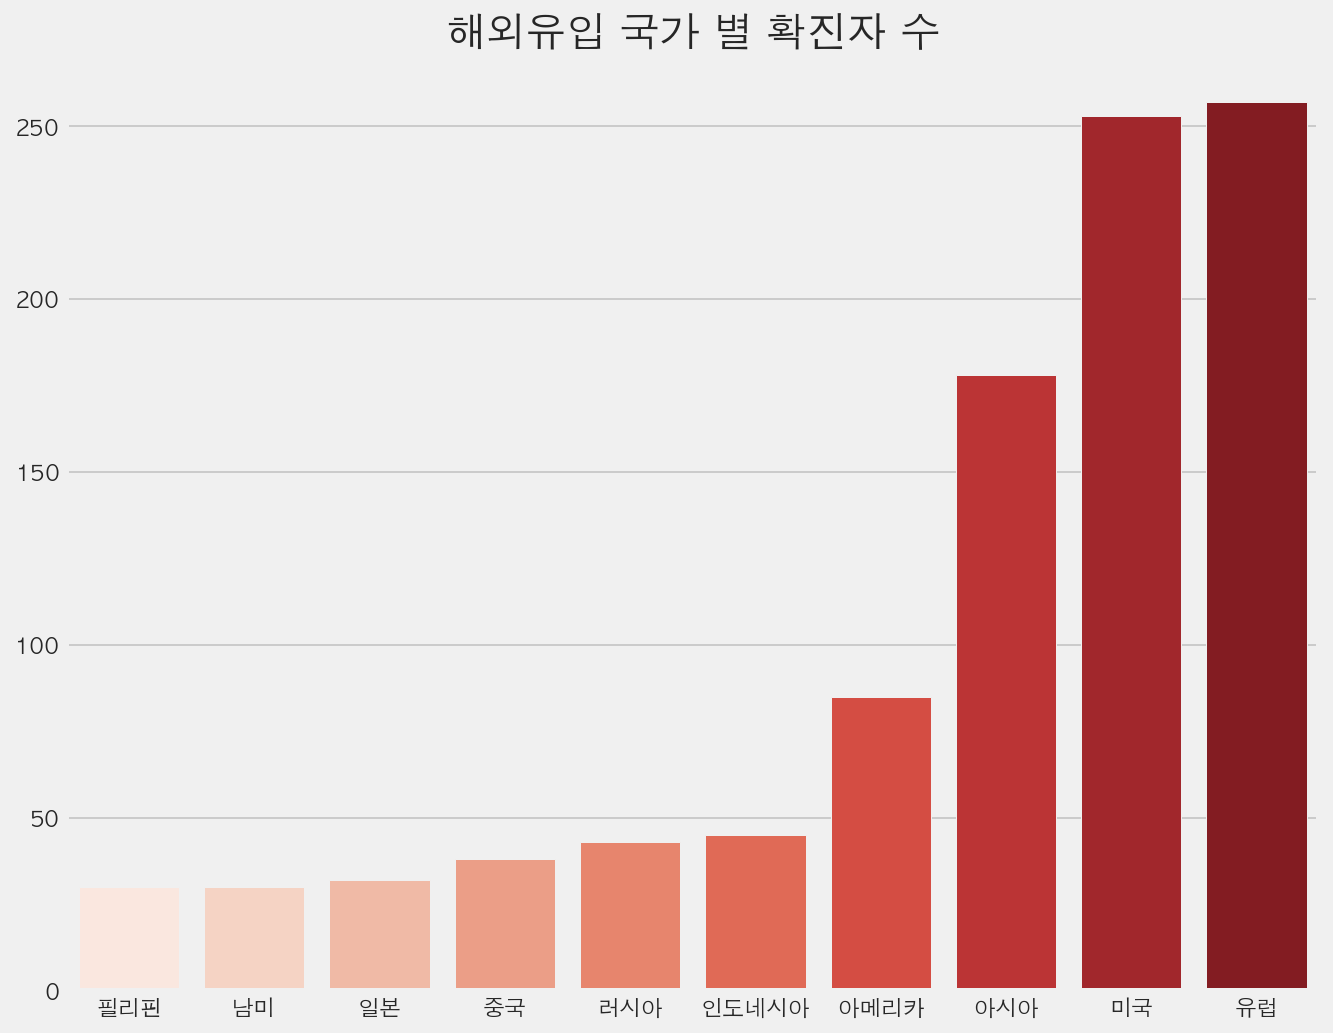

In [40]:
fig ,ax  = plt.subplots(figsize = (10, 8))
sns.barplot(oversea_count.index , oversea_count.values , ax = ax )
ax.set_title("해외유입 국가 별 확진자 수")

plt.show()

> 나라별 해외유입 확진자 수를 그린 막대차트 입니다.    
여행 제재가 풀린 유럽, 미국 입국자에서 확진자수 두드러지는 것을 볼 수 있습니다.

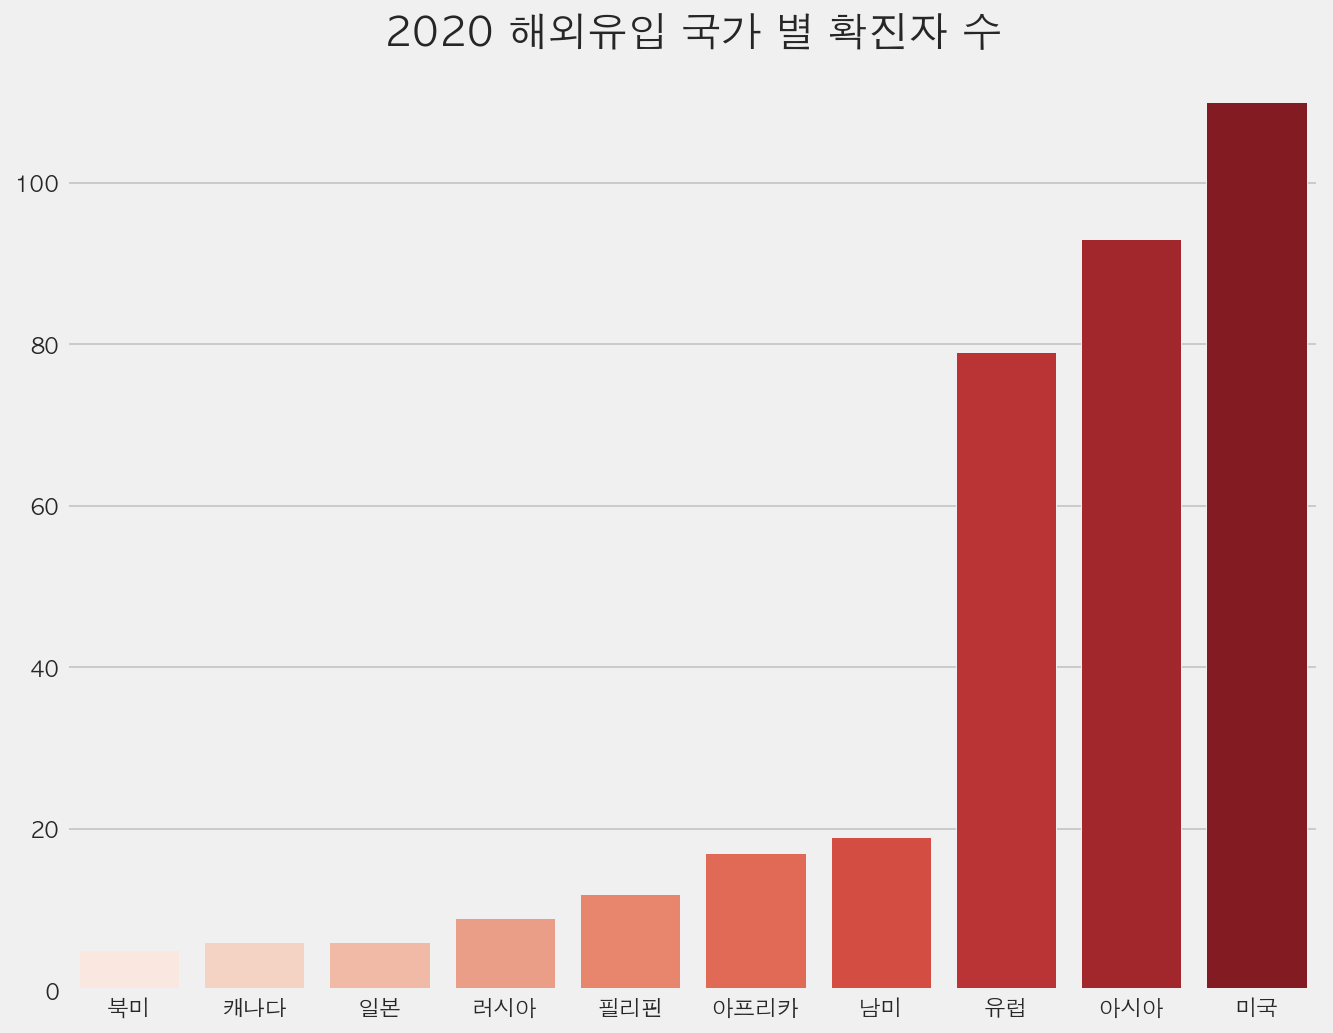

In [41]:
fig ,ax  = plt.subplots(figsize = (10, 8))
sns.barplot(oversea_count_2020.index , oversea_count_2020.values , ax = ax )
ax.set_title("2020 해외유입 국가 별 확진자 수")

plt.show()

> 유럽 봉쇄로 인해 20년도에는 미국.아시아 입국자 확진사 수가 대두됩니다.

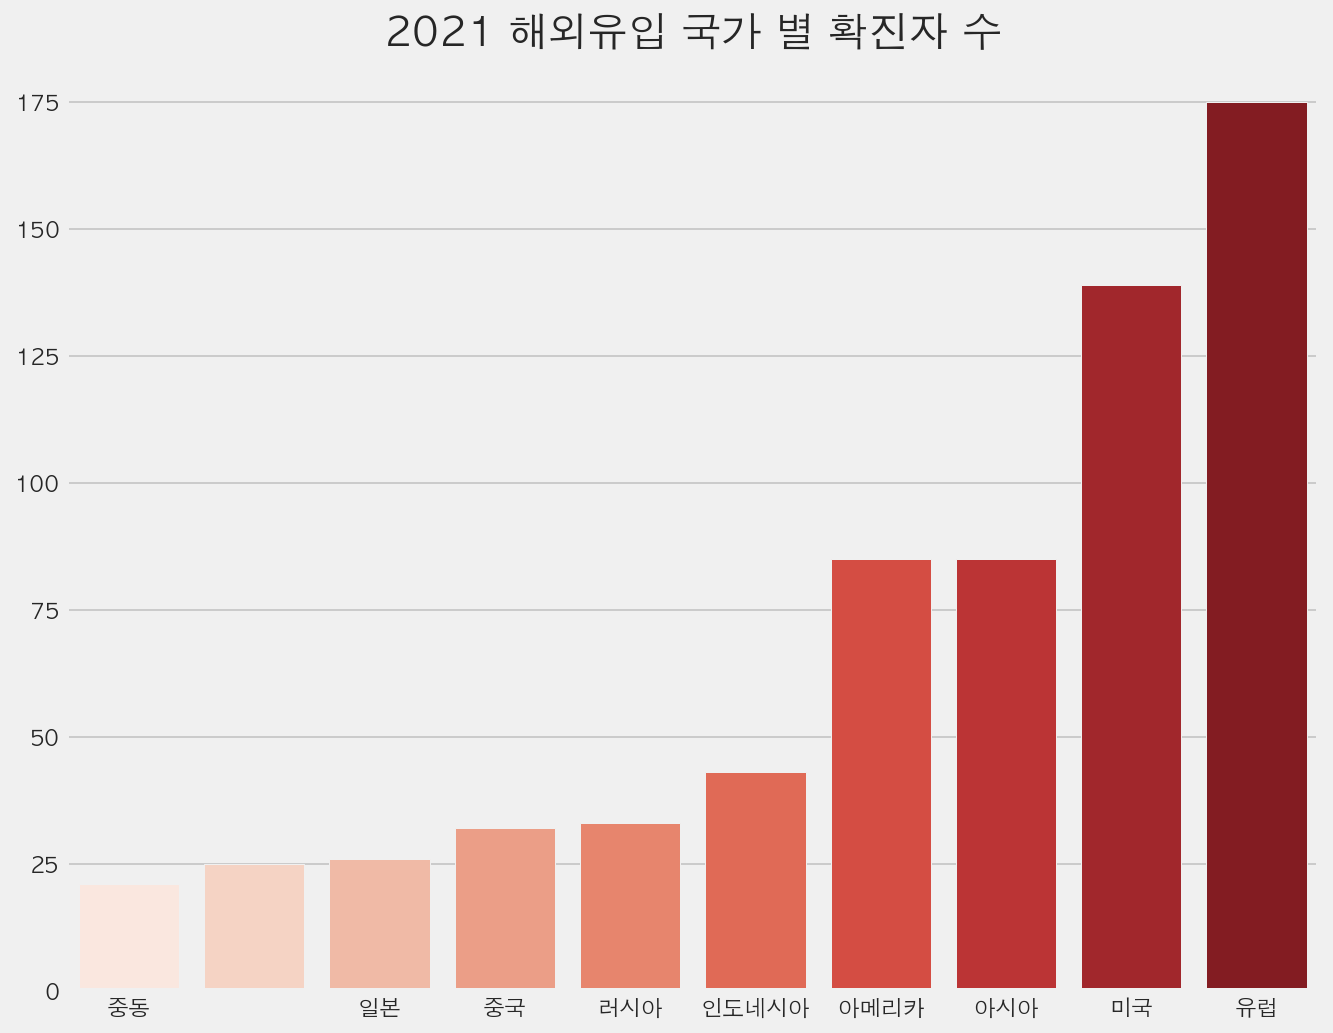

In [42]:
fig ,ax  = plt.subplots(figsize = (10, 8))
sns.barplot(oversea_count_2021.index , oversea_count_2021.values , ax = ax )
ax.set_title("2021 해외유입 국가 별 확진자 수")
plt.show()

> 21년도에는 유럽 여행봉쇄조치가 해제되면서 유럽입국자중 확진자수가 가장많이 나타나는 것을 볼 수 있습니다

## 지역별 확진자 수 파악 

In [43]:
x  = df["거주지"].value_counts().head(20)

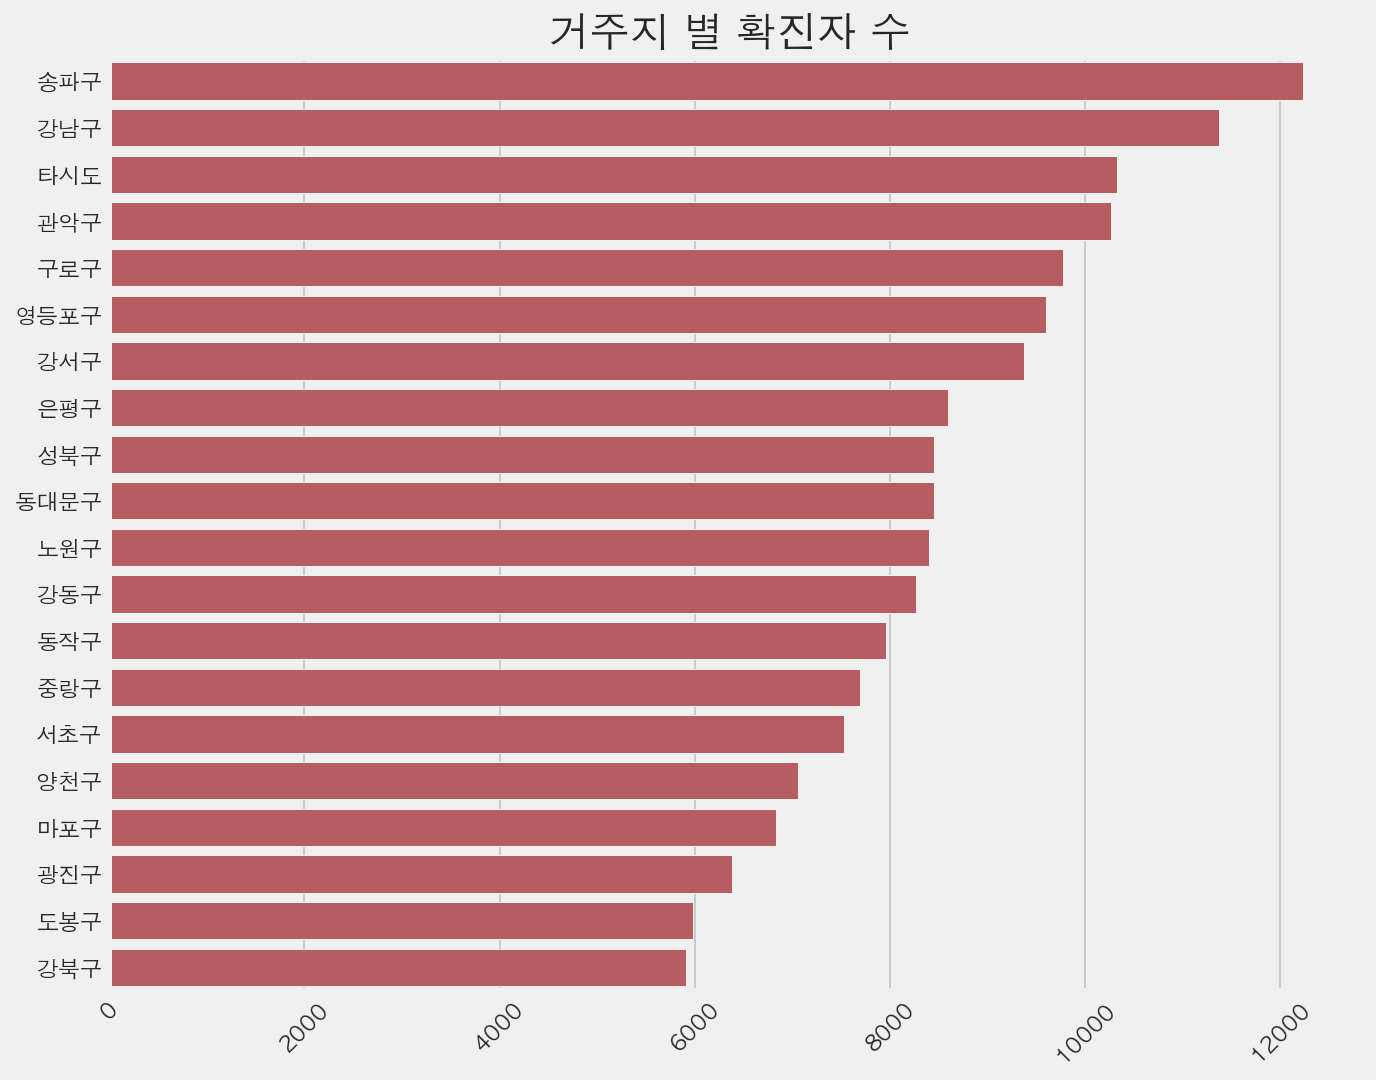

In [44]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x.values, x.index  , ax =ax , color = 'r')

ax.set_title("거주지 별 확진자 수 ")
plt.xticks(rotation = 45)
plt.show()

> 거주지별 확진자수를 나타낸 막대차트입니다.  
서울시 거주지 인구수는 송파구, 강서구, 노원구, 관악구 순으로 많습니다. 하지만 코로나 확진자수는 완전히 거주지인구수에 비례하게 나타나지 않는 모습을 볼 수 있습니다. 

In [45]:
# 거주지 별 전체 확진자
all_count_gu = df["거주지"].value_counts()
df_all_gu = all_count_gu.to_frame() # 시리즈를 데이터프레임으로 변환 
df_all_gu.columns = ["전체확진수"]


# 거주지 별 여행력을 가진 확진자 
oversea_count_gu = df_oversea["거주지"].value_counts()
df_oversea_gu = oversea_count_gu.to_frame()
df_oversea_gu.columns = ["여행력존재확진수"]

In [46]:
df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case

,전체확진수,여행력존재확진수
송파구,12232,198
강남구,11374,211
타시도,10330,117
관악구,10269,85
구로구,9777,60
영등포구,9604,95
강서구,9374,116
은평구,8597,96
성북구,8455,119
동대문구,8450,76


<AxesSubplot:>

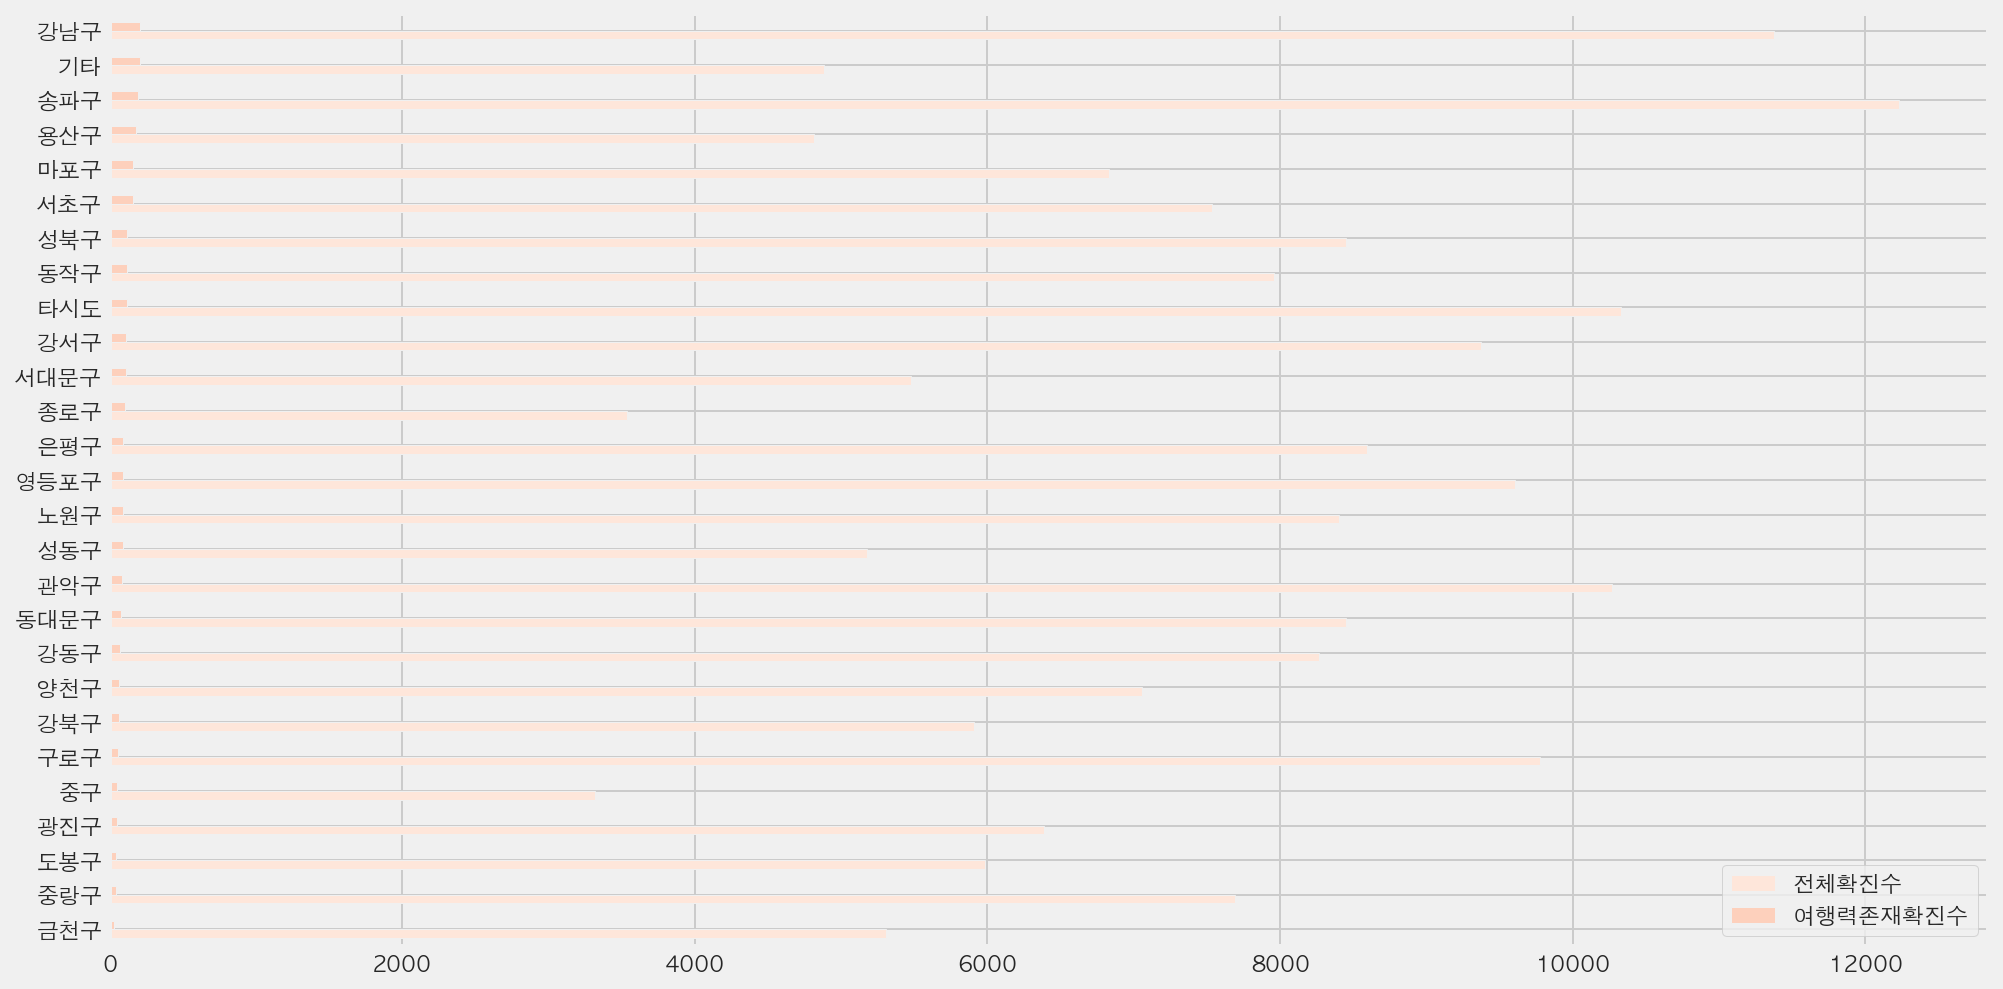

In [47]:
df_all_oversea_case.sort_values(by="여행력존재확진수").plot.barh(figsize=(15,8))

In [48]:
import folium

In [49]:
df_location = pd.read_csv("Data/위도,경도.csv")
df_location.head(3)

,거주지,Latitude,Longitude
0,강남구,37.517236,127.047325
1,강동구,37.530125,127.123762
2,강북구,37.639610,127.025657


In [50]:
df_location_m= df.merge(df_location, on = "거주지")
df_location_m

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,년,월,일,주,거리두기,퇴원,사망,해외,Latitude,Longitude
0,324,8816,2020-03-21,서초구,-,감염경로 조사중,퇴원,2020,3,21,12,0.0,True,False,NaN,37.483712,127.032411
1,313,8670,2020-03-20,서초구,미국,해외유입,퇴원,2020,3,20,12,0.0,True,False,미국,37.483712,127.032411
2,308,8692,2020-03-20,서초구,유럽,해외유입,퇴원,2020,3,20,12,0.0,True,False,유럽,37.483712,127.032411
3,234,8058,2020-03-13,서초구,-,플링크(IT기업),퇴원,2020,3,13,11,0.0,True,False,NaN,37.483712,127.032411
4,233,8127,2020-03-13,서초구,-,플링크(IT기업),퇴원,2020,3,13,11,0.0,True,False,NaN,37.483712,127.032411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187795,200218,562117,2021-12-18,종로구,-,감염경로 조사중,NaN,2021,12,18,50,4.0,False,False,NaN,37.572950,126.979358
187796,199469,561155,2021-12-18,종로구,-,기타 확진자 접촉,NaN,2021,12,18,50,4.0,False,False,NaN,37.572950,126.979358
187797,199185,559222,2021-12-18,종로구,-,감염경로 조사중,NaN,2021,12,18,50,4.0,False,False,NaN,37.572950,126.979358
187798,199166,559892,2021-12-18,종로구,-,기타 확진자 접촉,NaN,2021,12,18,50,4.0,False,False,NaN,37.572950,126.979358


In [51]:
df_location_count = pd.DataFrame(df.groupby(["거주지"])["연번"].count())
df_location_count.columns = ["확진자수"]
df_location_count = df_location_count[df_location_count["확진자수"] > 1] 
df_location_count.head(3)

,확진자수
거주지,
서대문구,5
강남구,11374
강동구,8266


In [52]:
import json 

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [53]:
map = folium.Map(location = [df_location_m["Latitude"].mean(), df_location_m["Longitude"].mean()],
                zoom_start = 11, tiles = 'Stamen Toner')

map.choropleth(
                geo_data = geo_str ,
                  data = df_location_count["확진자수"],
                  columns = [[df_location_count.index,df_location_count["확진자수"]]] ,
                   fill_color = 'Reds',
                  key_on = 'feature.properties.name' ,
               )

map

folium 함수를 사용해 시각적으로 거주지 별 확진자 수를 파악하기 쉽게 맵 그래프를 구현했습니다.